<a href="https://colab.research.google.com/github/RaulAtLehigh/CSE337_P1/blob/main/lab5_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Value-Function Approximation


## Exercise 1 SGD
Many real-world processes can be modeled as nonlinear relationships, and SGD is a standard tool to fit those models from data.  

**Example: Predicting energy consumption in a building**  
- Energy usage depends on **temperature**, **time of day**, and **occupancy**.  
- If you plot the data, the relationship might not be linear — it curves.  
- A simple way to approximate this nonlinear relation is to fit a **polynomial function** of temperature (or time).  

Now, imagine you’re collecting data continuously:  
- You get one data point (temperature, usage) at a time.  
- Instead of waiting to collect all data and computing a full batch update, you update your model incrementally with **SGD**.  
- This makes your learning **online, adaptive, and scalable** — just like in reinforcement learning.  

---

In this exercise, approximating a cubic polynomial is a simplified version of **predicting a nonlinear real-world phenomenon**.


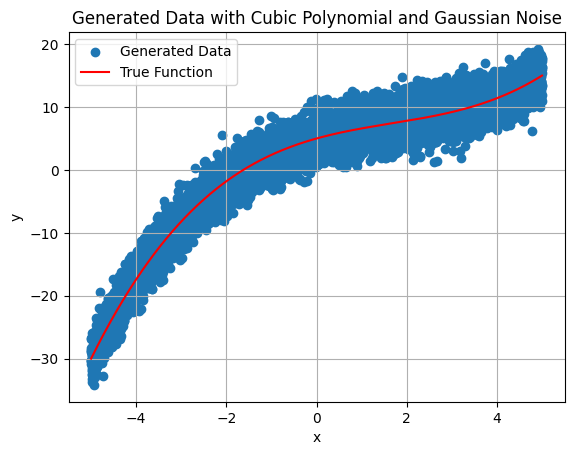

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data based on a cubic polynomial with Gaussian noise
np.random.seed(42)  # for reproducibility
n_samples = 10000
x = np.linspace(-5, 5, n_samples)
# Define the true cubic polynomial function
def true_function(x):
  return 0.1 * x**3 - 0.5 * x**2 + 2 * x + 5

y_true = true_function(x)
noise = np.random.normal(0, 2, n_samples)  # Gaussian noise with mean 0 and std dev 2
y = y_true + noise
# Optional: Plot the generated data
plt.scatter(x, y, label='Generated Data')
plt.plot(x, y_true, color='red', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data with Cubic Polynomial and Gaussian Noise')
plt.legend()
plt.grid(True)
plt.show()

Based on the given a dataset of input–output pairs `(x, y)` where the underlying relationship is approximately polynomial.  

a. Use a **linear model with polynomial features**: Write a function that takes an input `x` and a weight vector `w`, and return the predicted value y_hat.    
   
   - y_hat(x; w) = w0 + w1 * x + w2 * x^2 + w3 * x^3  

   where w0, w1, w2, w3 are the parameters to be learned.

b. **Loss function (Mean Squared Error)**:
   Write a function that computes the loss for one training point `(x, y)`:

     - Formula: `loss = 0.5 * (y - y_hat)**2`

c. **SGD update**:   Derive the gradient of the loss with respect to each parameter (w0, w1, w2, w3).  
   - Write a function:  

     ```python
     def sgd_update(x, y, w, alpha):
         """
         Perform one SGD update for a single training example.
         Input:
             x (float) - input value
             y (float) - true output
             w (np.array) - current weights
             alpha (float) - learning rate
         Output:
             w (np.array) - updated weights
         """
         # TODO: compute prediction, gradient, and update weights
         return w
     ```
d. **Training loop**:
   - Loop over the dataset.  
   - At each step, update the weights using `sgd_update`.  
   - Track the training loss after each iteration.  

e. **Comparison with different learning rates**  
   - Train your model using at least three different learning rates, for example:  
     - alpha = 0.001  
     - alpha = 0.01  
     - alpha = 0.1  
   - Plot training loss vs iteration for each learning rate.  
   - Plot the final fitted polynomial curves for each learning rate on the same graph with the true dataset.

---

### Deliverables
- Code for `predict`, `mse_loss`, and `sgd_update`.  
- Training loop that runs with multiple learning rates.  
- Plot of training loss vs iteration for each learning rate.  
- Plot of the fitted polynomial vs dataset for each learning rate.  
- A short discussion:
  - How does the learning rate affect convergence speed and stability?  
  - Which learning rate gives the best balance between speed and accuracy?  

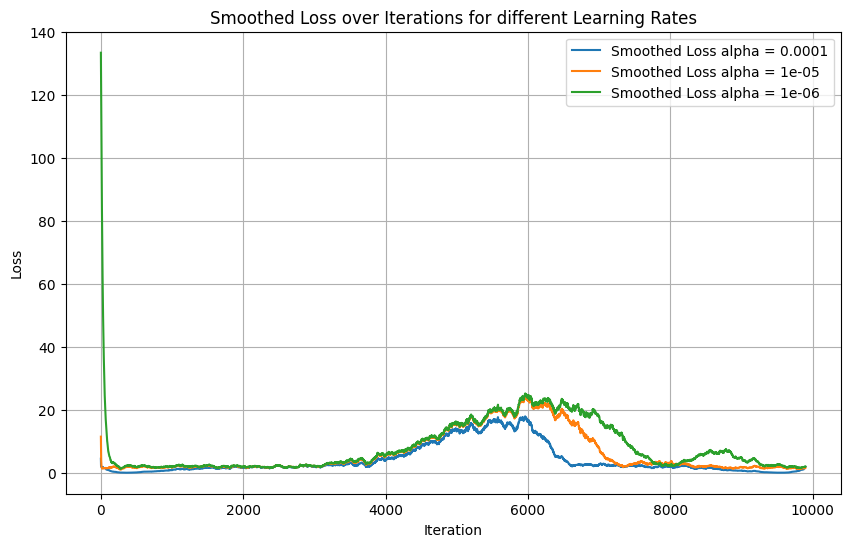

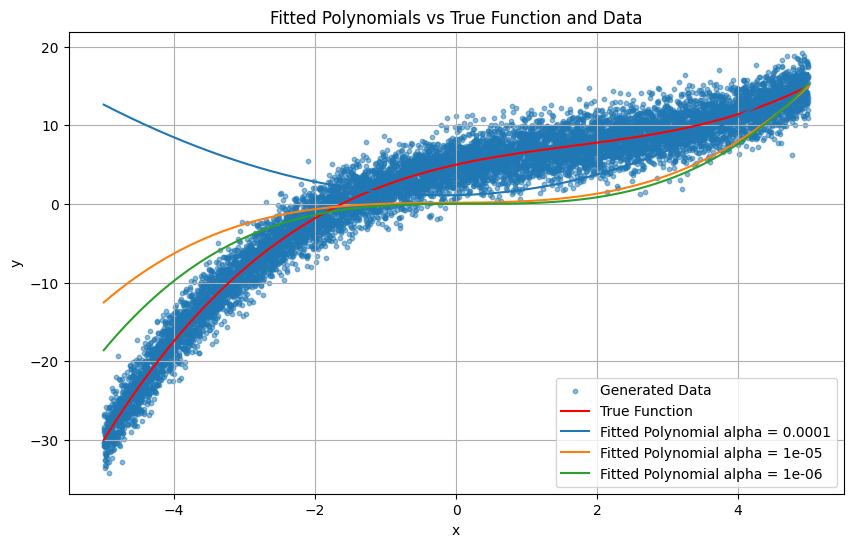

In [ ]:
## a
## x is the feature vector
## w is the weights
def predict(x, w):
  # Using np.float64 for explicit casting, although numpy arrays handle this
  return np.float64(w[0]) + np.float64(w[1]) * np.float64(x) + np.float64(w[2]) * np.float64(x)**2 + np.float64(w[3]) * np.float64(x)**3

## Loss function (MSE)
def mse_loss(y, y_hat):
  # Ensure calculations are done in float64 to prevent potential overflow with intermediate results
  return np.float64(0.5) * np.float64((y - y_hat))**2

def sgd_update(x, y, w, alpha):
    """
    Perform one SGD update for a single training example.
    Input:
        x (float) - input value
        y (float) - true output
        w (np.array) - current weights
        alpha (float) - learning rate
    Output:
        w (np.array) - updated weights
    """
    # TODO: compute prediction, gradient, and update weights
    y_hat = predict(x, w)

    error = np.float64(y - y_hat)

    w[0] += np.float64(alpha) * error
    w[1] += np.float64(alpha) * error * np.float64(x)
    w[2] += np.float64(alpha) * error * np.float64(x)**2
    w[3] += np.float64(alpha) * error * np.float64(x)**3
    return w

## training loop
# Using the original learning rates gave me overflow issues, so I'm using these
alpha_values = np.array([.0001, .00001, .000001])
all_loss = []
final_weights = []


for alpha in alpha_values:
  w = np.zeros(4, dtype=np.float64)
  loss = []
  for i in range(0, n_samples):
    w = sgd_update(x[i], y[i], w, alpha)
    current_loss = mse_loss(y[i], predict(x[i], w))
    loss.append(current_loss)

    if np.isnan(current_loss) or np.isinf(current_loss) or np.any(np.isnan(w)) or np.any(np.isinf(w)):
        print(f"Stopping training for alpha={alpha} due to overflow or NaN at iteration {i}")
        break
  all_loss.append(loss)
  final_weights.append(w)

# Function to calculate moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

# Plot smoothed loss curves
window_size = 100
plt.figure(figsize=(10, 6))
for i, loss_data in enumerate(all_loss):
    if len(loss_data) >= window_size: # Ensure enough data points for moving average
      smoothed_loss = moving_average(loss_data, window_size)
      plt.plot(smoothed_loss, label=f"Smoothed Loss alpha = {alpha_values[i]}")
    else:
      plt.plot(loss_data, label=f"Loss alpha = {alpha_values[i]} (not smoothed)")


plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Smoothed Loss over Iterations for different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

# Plot the true function and the fitted polynomials
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Generated Data', alpha=0.5, s=10)
plt.plot(x, y_true, color='red', label='True Function')

for i, w in enumerate(final_weights):
    # Calculate the corresponding y_fitted values using the final weights and the original x for plotting
    y_fitted = predict(x, w)
    plt.plot(x, y_fitted, label=f'Fitted Polynomial alpha = {alpha_values[i]}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Polynomials vs True Function and Data')
plt.legend()
plt.grid(True)
plt.show()

**------Discussion:------**
1. A higher learning rate results in a faster covergence to a smaller MSE. I do think it results in less stability as data becomes more generalized with each pass, since each step is more significant for in the grand scope of things.
2. 1e-05 as the learning rate resulted in the best balance. While I don't get very close to the true function in either, I think this learning rate, has a good convergence rate and looks more similar to the true function.

## Exercise 2: 1000-State Random Walk with Semi-Gradient TD(0)

We will study the 1,000-state Random Walk a classic reinforcement learning benchmark from Sutton & Barto.  

- The environment has states numbered **1 to 1000**.  
- There are two **terminal states**:  
  - State `0` on the left (reward = 0)  
  - State `1001` on the right (reward = 1)  
- Each episode starts in the **middle** at state `500`.  
- At each step, the agent moves **left or right with equal probability (0.5 each)**.  
- The episode ends when the agent reaches either terminal.  
- Discount factor: **γ = 1.0** (episodic task).  


### Function Approximation
Instead of storing a separate value for each state, approximate the value function with a **linear function of the state index**: V_hat(s; w0, w1) = w0 + w1 * s



---

## Instructions
1. **Implement the environment**:  
   - You may **use AI tools such as ChatGPT** to generate the environment code (states, transitions, rewards).  
   - Make sure you understand how the environment works.  

2. **Implement the TD(0) update manually**:  
   - Do **not** use AI for this part.  
   - You must write the gradient update equations yourself using the formulas above.  

3. **Train your agent**:  
   - Run several episodes (e.g., 1000 episodes).  
   - Experiment with different step sizes (`alpha`).  

4. **Evaluate**:  
   - Plot the **true value function** `V*(s) = s/1001`.  
   - Plot your **learned approximation line** after training.  
   - Discuss whether the line captures the overall trend of the true values.  

---


## Guidelines on Using AI Tools
- You are encouraged to use AI tools (e.g., ChatGPT, Gemini, Copilot) to **generate helper code**, such as:  
  - Building the random walk environment (`reset`, `step`).  
  - Implementing the feature map φ(s).  
  - Plotting results.  
- However, **do not use AI tools to generate the TD(0) update equation**.  
  - Deriving and implementing the update is the key learning objective of this exercise.  
  - If we find code that uses an AI-generated update without understanding, the score will be zero.  


## Deliverables
- Python code for the environment and the TD(0) algorithm.  
- Plot the **true value function**: For state `s`, the probability of reaching the right terminal is:  
  `V*(s) = s / 1001`
- Plot comparing the true value function and the approximated line.  
- A short discussion:  
  - How does the approximation behave for small vs large states?  
  - How does the learning rate affect convergence?  

---

## Hints
- Normalize states to `[0,1]` before using them in the line approximation to avoid very large values for w1.  
- Start with small step sizes (e.g., 0.001–0.01).  
- The approximation will not be perfect (a line cannot match the true curve), but should capture the increasing trend.  


In [ ]:
# AI generated 1000 walk simulator
import numpy as np

class RandomWalkEnvironment:
    def __init__(self):
        self.n_states = 1000
        self.start_state = 500
        self.current_state = self.start_state
        self.terminal_left = 0
        self.terminal_right = 1001

    def reset(self):
        """Resets the environment to the starting state."""
        self.current_state = self.start_state
        return self.current_state

    def step(self, action):
        """
        Takes a step in the environment.

        Args:
            action (int): 0 for left, 1 for right.

        Returns:
            tuple: (next_state, reward, done)
        """
        if action == 0: # Move left
            self.current_state -= 1
        elif action == 1: # Move right
            self.current_state += 1
        else:
            raise ValueError("Invalid action")

        # Check for terminal states
        done = False
        reward = 0
        if self.current_state <= self.terminal_left:
            self.current_state = self.terminal_left
            done = True
            reward = 0
        elif self.current_state >= self.terminal_right:
            self.current_state = self.terminal_right
            done = True
            reward = 1

        return self.current_state, reward, done

In [ ]:
import random
# TD(0)
def random_policy():
  return random.randint(0,1)

# the feature vector here should probably just be one dimensional
# we can get the most information from the state we're at
# # w = weight , x = state
# nvm.. instructions say: V_hat(s; w0, w1) = w0 + w1 * s
def predict(s, w):
  return np.float64(w[0]) + np.float64(w[1]) * np.float64(s)

## start the td
n_episodes = 1000
env = RandomWalkEnvironment()
alpha = [.001, .01, .1]
w_agg = []

for j, alpha_val in enumerate(alpha):
  w = [0.0, 0.0] # Initialize w for each alpha value
  for ep in range(0, n_episodes):
    #print(f"Starting episode", {ep + 1})
    # initialize S
    S = env.reset()
    terminal = False
    # Loop for each step of episode
    while not terminal:
      # choose A ~ policy(.|S)
      A = random_policy()
      # take action A observe R, S'
      next_state, reward, terminal = env.step(A)
      # w <- w + alpha[R + lambda * v_hat(S',w) - v_hat(S, w)]
      # should normalize (left state should probably be 0)
      normalized_state = S/1001
      error = (reward + predict(next_state, w) - predict(S, w))
      #print(j)
      w[0] += alpha_val * error
      w[1] += alpha_val * error * normalized_state
      # S <- S'
      S = next_state
  w_agg.append(w) # Append the final weights for this alpha
  print(f'Completed {n_episodes} episodes for alpha = {alpha_val}')

Completed 1000 episodes for alpha = 0.001
Completed 1000 episodes for alpha = 0.01
Completed 1000 episodes for alpha = 0.1


[np.float64(-0.2535073343031479), np.float64(0.04912030701747525)]
[np.float64(-3.7468631777499977), np.float64(0.0003098106907168594)]
[np.float64(-24.158913677832565), np.float64(-1.1466611182990443e-18)]


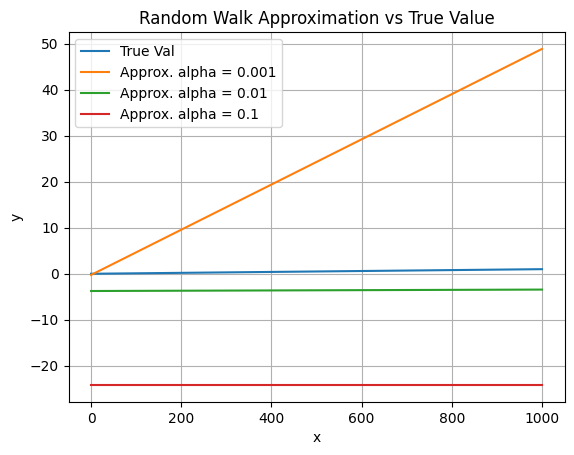

In [ ]:
import matplotlib.pyplot as plt


def true_func(x):
  return x /1001

true_line = [true_func(i) for i in range(1001)]
x_axis = [x for x in range(1001)]

plt.plot(x_axis, true_line, label='True Val')
for j, alpha_val in enumerate(alpha):
  print(w_agg[j])
  approx_line = [predict(s, w_agg[j]) for s in range(1001)]
  plt.plot(x_axis, approx_line, label=f'Approx. alpha = {alpha_val}')

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Random Walk Approximation vs True Value")
plt.show()




It seems like the training under alpha = 0.01 did a really good job at approximating the value as it looks very similar to the true value function.
**Discussion:**

1.  **How does the approximation behave for small vs large states?**
    Overall the value of the estimated weights seem to capture the overall trend of increasing value for larger states (except for when `alpha = .1`) . I think the equal nature of the environment (500 on one side and 500 on another side) adds a level of difficulty since only one state gives a reward and that state is less common (happens once every episode... if we even go to that side).

2.  **How does the learning rate affect convergence?**
    The learning rate significantly impacts the convergence of the TD(0) algorithm. In this example, the intermmediate learning rate: `alpha = 0.01` resulted in the best approximation of the true value function after 1000 episodes. A higher learing rate led to the model making up false weights as the trend became a decreasing trend over time when I used `alpha = .1`


# Exercise 3: Solving MountainCar with Tile Coding and SARSA

## Problem Description
In this exercise, you will solve the **MountainCar-v0** environment from Gym using **tile coding** for function approximation and the **SARSA algorithm** for learning.  

The **Mountain Car problem**:
- A car is stuck in a valley and is too weak to drive straight up to the goal.  
- It must build momentum by going back and forth until it can reach the goal at `position >= 0.5`.  
- **State space**: continuous (position, velocity).  
- **Actions**: {0: push left, 1: no push, 2: push right}.  
- **Reward**: -1 per step until the goal is reached.  
- **Episode ends**: when the car reaches the goal or after 200 steps.  

---

## Step 1: Environment and Random Policy (with AI help)
- Use an **AI tool (e.g., ChatGPT)** to generate starter code for:
  - Creating the Gym environment (`MountainCar-v0`).  
  - Running a **random policy** (actions chosen randomly).  
- Run this code to confirm you can interact with the environment and see episode returns.  
- This will serve as a **baseline**.  
- **Important**: Do not use AI to implement the learning algorithm.  

---

## Step 2: SARSA Algorithm with Function Approximation
Implement **SARSA (on-policy TD control)** with the following steps:

For each episode:
1. Initialize state `s`.  
2. Choose action `a` using **ε-greedy** based on Q(s,a).  
3. For each step:  
   - Take action `a`, observe `(s_next, r, done)`.  
   - Choose next action `a_next` using ε-greedy from `s_next`.  
   - Compute TD target:  
     ```
     target = r + gamma * Q(s_next, a_next)
     ```  
     (if `s_next` is terminal, then target = r).  
   - Compute TD error:  
     ```
     delta = target - Q(s,a)
     ```  
   - Update weights:  
     ```
     w <- w + alpha * delta * x(s,a)
     ```  
   - Update `s = s_next`, `a = a_next`.  
4. End episode when the goal is reached or step limit is hit.  

---

## Step 3: Experiments
- Train the agent for 500–1000 episodes.  
- Plot **episode returns (sum of rewards)** vs episodes.  
- Compare with the random policy baseline:  
  - Does SARSA learn to consistently reach the goal?  
  - How many steps does it typically take?  

---

## Deliverables
- Python code for tile coding and SARSA.  
- Plot of returns vs episodes.  
- Plot the Value function
- Short discussion (1–2 paragraphs):  
  - Effect of tile coding parameters (number of tilings, resolution).


In [4]:
# You can use the following code for tiling

import numpy as np


class TileCoderXY:
    """
    A TileCoder for function approximation that applies tile coding on the x and y coordinates
    of a 3D state. Instead of providing tile widths, the user provides the number of tiles per
    dimension. The tile widths are computed based on the state bounds and the number of tiles.
    The z coordinate is not used.
    """

    def __init__(self, num_tilings, tiles_per_dim, state_low, state_high):
        """
        Initialize the TileCoderXY.

        Parameters:
            num_tilings (int): Number of overlapping tilings.
            tiles_per_dim (array-like of 2 ints): Number of tiles along the x and y dimensions.
            state_low (array-like of 2 floats): Lower bounds for the x and y dimensions.
            state_high (array-like of 2 floats): Upper bounds for the x and y dimensions.
        """
        self.num_tilings = num_tilings
        self.tiles_per_dim = np.array(tiles_per_dim, dtype=int)
        self.state_low = np.array(state_low, dtype=float)
        self.state_high = np.array(state_high, dtype=float)

        # Compute the tile width for each dimension.
        # We assume that the grid spans exactly from state_low to state_high.
        # When there are N tiles, there are N-1 intervals between the boundaries.
        self.tile_width = (self.state_high - self.state_low) / (self.tiles_per_dim - 1)

        # Precompute an offset for each tiling to create overlapping grids.
        # self.offsets = [(i / self.num_tilings) * self.tile_width for i in range(self.num_tilings)]
        # self.offsets = self.compute_8_offsets()
        # self.offsets = np.stack(self._compute_offsets(), axis=0)  # shape: (num_tilings, dims)
        # Precompute offsets for each tiling.
        # For tiling i:
        #   offset_x = (((i + 0) % num_tilings) / num_tilings) * tile_width[0]
        #   offset_y = (((i + 1) % num_tilings) / num_tilings) * tile_width[1]
        offsets = np.empty((self.num_tilings, 2))
        for i in range(self.num_tilings):
            offsets[i, 0] = (((i + 0) % self.num_tilings) / self.num_tilings) * self.tile_width[0]
            offsets[i, 1] = (((i + 1) % self.num_tilings) / self.num_tilings) * self.tile_width[1]
        self.offsets = offsets


        # Precompute multiplier for flattening a 2D index.
        # For grid shape (N, M), flat index = x_index * M + y_index.
        self.multiplier = self.tiles_per_dim[1]

        # Initialize a weight vector for each tiling.
        num_tiles = np.prod(self.tiles_per_dim)
        self.weights = [np.zeros(num_tiles) for _ in range(self.num_tilings)]

    def save(self, file_name):
        np.savez(file_name + ".npz", weights=self.weights)

    def load(self, file_name):
        self.weights = np.load(file_name+".npz")["weights"]


    def compute_8_offsets(self):
        """
        Compute a list of offsets using a combination of cardinal and diagonal directions.
        The offsets include:
          - Center: [0, 0]
          - Cardinal: right, left, up, down (half-tile shifts)
          - Diagonal: up-right, up-left, down-right, down-left (half-tile shifts)

        If the number of tilings exceeds the number of unique offsets (9), the list is repeated.

        Returns:
            List of 2-element numpy arrays representing the offset for each tiling.
        """
        half_tile = self.tile_width / 8.0
        base_offsets = [
            np.array([0.0, 0.0]),  # Center (no shift)
            np.array([half_tile[0], 0.0]),  # Right
            np.array([-half_tile[0], 0.0]),  # Left
            np.array([0.0, half_tile[1]]),  # Up
            np.array([0.0, -half_tile[1]]),  # Down
            np.array([half_tile[0], half_tile[1]]),  # Up-right
            np.array([-half_tile[0], half_tile[1]]),  # Up-left
            np.array([half_tile[0], -half_tile[1]]),  # Down-right
            np.array([-half_tile[0], -half_tile[1]])  # Down-left
        ]
        offsets = []
        for i in range(self.num_tilings):
            offsets.append(base_offsets[i % len(base_offsets)])
        return offsets

    def get_tile_indices(self, state):
        """
        Compute the active tile indices for all tilings given a 2D state.

        Parameters:
            state (array-like of length 2): The input state [x, y].

        Returns:
            List of tuples (tiling_index, flat_tile_index) for each tiling.
        """
        state = np.array(state, dtype=float)  # shape: (2,)
        # Compute shifted states for all tilings in one vectorized operation.
        # Shape of shifted: (num_tilings, 2)
        shifted = (state - self.state_low) + self.offsets

        # Compute tile coordinates (integer indices) for each tiling.
        # Division is broadcasted over the offsets.
        tile_coords = (shifted / self.tile_width).astype(int)  # shape: (num_tilings, 2)

        # Clip to ensure indices are within bounds.
        tile_coords[:, 0] = np.clip(tile_coords[:, 0], 0, self.tiles_per_dim[0] - 1)
        tile_coords[:, 1] = np.clip(tile_coords[:, 1], 0, self.tiles_per_dim[1] - 1)

        # Compute flat indices for each tiling.
        # flat_index = x_index * (tiles_per_dim[1]) + y_index
        flat_indices = tile_coords[:, 0] * self.tiles_per_dim[1] + tile_coords[:, 1]

        # Return a list of (tiling_index, flat_index) tuples.
        return list(zip(range(self.num_tilings), flat_indices))


    def predict(self, state):
        """
        Compute the approximated function value for a given 3D state using tile coding on x and y.

        Parameters:
            state (array-like): The input state [x, y, z].

        Returns:
            float: The function approximation (sum of weights for the active tiles).
        """
        active_tiles = self.get_tile_indices(state)
        return sum(self.weights[tiling][idx] for tiling, idx in active_tiles)

    def update(self, state, target, alpha):
        """
        Update the weights given a state and target value.

        Parameters:
            state (array-like): The input state [x, y, z].
            target (float): The target function value.
            alpha (float): The overall learning rate.
        """

        prediction = self.predict(state)
        error = target - prediction
        # Distribute the learning rate equally among all tilings.
        alpha_per_tiling = alpha / self.num_tilings

        active_tiles = self.get_tile_indices(state)
        for tiling, idx in active_tiles:
            self.weights[tiling][idx] += alpha_per_tiling * error






In [ ]:
## Step 1: Environment and Random Policy (with AI help)
import gymnasium as gym
import random

# Create the MountainCar environment
env = gym.make('MountainCar-v0')

def run_random_policy(env, num_episodes=10):
    """
    Runs a random policy on the MountainCar environment for a specified number of episodes.

    Args:
        env: The MountainCar environment.
        num_episodes (int): The number of episodes to run.

    Returns:
        list: A list of total rewards for each episode.
    """
    episode_returns = []
    for episode in range(num_episodes):
        state, info = env.reset()
        done = False
        total_reward = 0

        while not done:
            action = env.action_space.sample()  # Choose a random action
            next_state, reward, terminated, truncated, info = env.step(action)
            total_reward += reward
            state = next_state
            done = terminated or truncated

        episode_returns.append(total_reward)
        print(f"Episode {episode + 1}: Total Reward = {total_reward}")
    return episode_returns

# Run the random policy
random_returns = run_random_policy(env, num_episodes=20)

# Close the environment
env.close()

print("\nAverage reward with random policy:", np.mean(random_returns))

In [11]:
"""
For each episode:

Initialize state s.
Choose action a using ε-greedy based on Q(s,a).
For each step:
Take action a, observe (s_next, r, done).
Choose next action a_next using ε-greedy from s_next.
Compute TD target:
target = r + gamma * Q(s_next, a_next)
(if s_next is terminal, then target = r).
Compute TD error:
delta = target - Q(s,a)
Update weights:
w <- w + alpha * delta * x(s,a)
Update s = s_next, a = a_next.
End episode when the goal is reached or step limit is hit.
"""
import gymnasium as gym
import random
import numpy as np

# Create the MountainCar environment
env = gym.make('MountainCar-v0', max_episode_steps = 500)

num_episodes = 500
tile_dim = 8
# Box: [-1.2 -0.07], [0.6 0.07]
# initializing the tiles for each action, each one has its own weight vector
left_tiles = TileCoderXY(tile_dim, [tile_dim, tile_dim], [-1.2, -0.07], [0.6, 0.07])
right_tiles = TileCoderXY(tile_dim, [tile_dim, tile_dim], [-1.2, -0.07], [0.6, 0.07])
stay_tiles = TileCoderXY(tile_dim, [tile_dim, tile_dim], [-1.2, -0.07], [0.6, 0.07])
epsilon = .05 # randomness rate
alpha = .125 # learning rate
gamma = 1 # discount rate
n_actions = 3

def epsilon_greedy(state):
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    else:
      possibleActions = [left_tiles.predict(state), stay_tiles.predict(state), right_tiles.predict(state)]
      action = np.argmax(possibleActions)
      return action

for episode in range(num_episodes):
  state, info = env.reset()
  done = False
  total_reward = 0
  action = epsilon_greedy(state)

  while not done:
      # Take action a, observe (s_next, r, done).
      next_state, reward, terminated, truncated, info = env.step(action)
      total_reward += reward
      # Choose next action a_next using ε-greedy from s_next.
      next_action = epsilon_greedy(next_state)
      # target = r + gamma * Q(s_next, a_next)
      done = terminated or truncated
      q_next = [left_tiles.predict(next_state),
          stay_tiles.predict(next_state),
          right_tiles.predict(next_state)][next_action]
      target = reward if done else reward + gamma * q_next
      if action == 0: ##left
          left_tiles.update(state, target, alpha)
      elif action == 1: ## no push
          stay_tiles.update(state, target, alpha)
      else: ## right
          right_tiles.update(state, target, alpha)
      state = next_state
      action = next_action


  print(f"Episode {episode + 1}: Total Reward = {total_reward}")




Episode 1: Total Reward = -500.0
Episode 2: Total Reward = -500.0
Episode 3: Total Reward = -500.0
Episode 4: Total Reward = -500.0
Episode 5: Total Reward = -500.0
Episode 6: Total Reward = -500.0
Episode 7: Total Reward = -500.0
Episode 8: Total Reward = -500.0
Episode 9: Total Reward = -500.0
Episode 10: Total Reward = -500.0
Episode 11: Total Reward = -500.0
Episode 12: Total Reward = -500.0
Episode 13: Total Reward = -500.0
Episode 14: Total Reward = -500.0
Episode 15: Total Reward = -500.0
Episode 16: Total Reward = -309.0
Episode 17: Total Reward = -473.0
Episode 18: Total Reward = -500.0
Episode 19: Total Reward = -202.0
Episode 20: Total Reward = -465.0
Episode 21: Total Reward = -414.0
Episode 22: Total Reward = -315.0
Episode 23: Total Reward = -500.0
Episode 24: Total Reward = -217.0
Episode 25: Total Reward = -500.0
Episode 26: Total Reward = -275.0
Episode 27: Total Reward = -286.0
Episode 28: Total Reward = -500.0
Episode 29: Total Reward = -254.0
Episode 30: Total Rewar

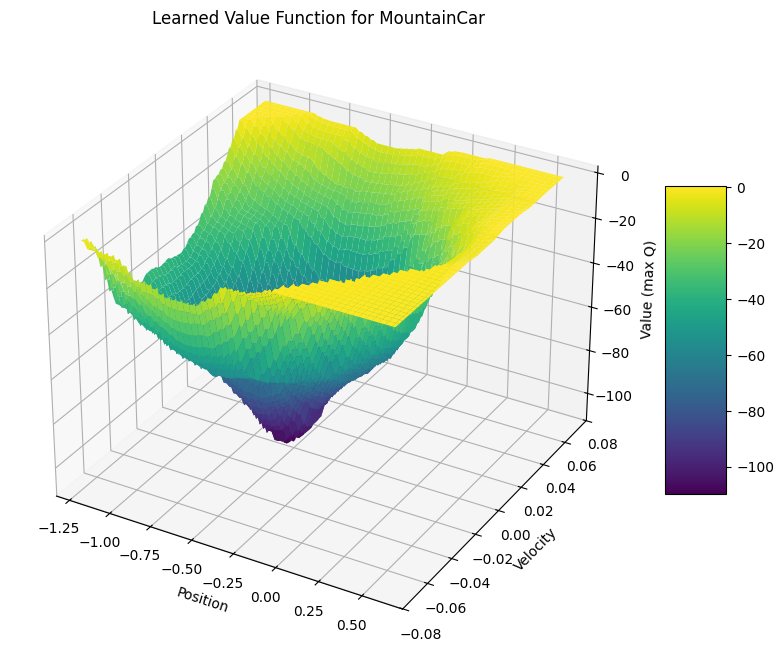

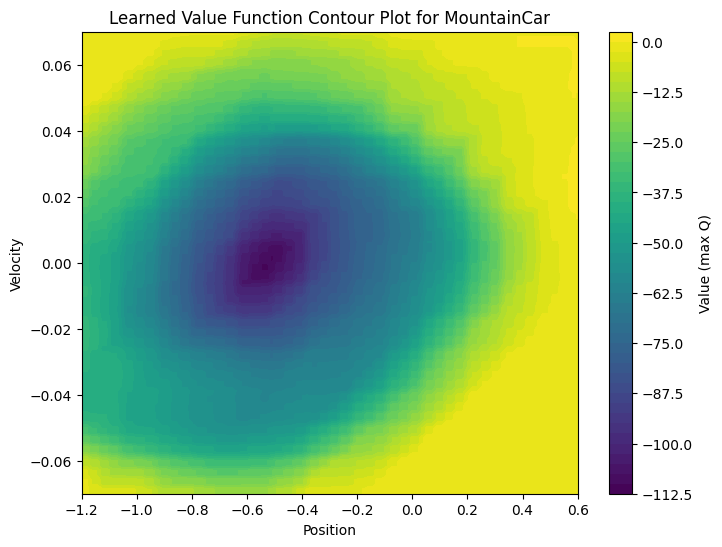

In [12]:
#Using AI to plot the value function in a 3d grid

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the state space grid for plotting
# Position range: [-1.2, 0.6]
# Velocity range: [-0.07, 0.07]
position_space = np.linspace(-1.2, 0.6, 100)
velocity_space = np.linspace(-0.07, 0.07, 100)

# Create a meshgrid for plotting
pos_grid, vel_grid = np.meshgrid(position_space, velocity_space)

# Calculate the value (max Q-value) for each state in the grid
value_grid = np.zeros_like(pos_grid)

for i in range(pos_grid.shape[0]):
    for j in range(pos_grid.shape[1]):
        state = [pos_grid[i, j], vel_grid[i, j]]
        # Calculate Q-values for each action in this state
        q_values = [left_tiles.predict(state), stay_tiles.predict(state), right_tiles.predict(state)]
        # The value of a state is the maximum Q-value over all actions
        value_grid[i, j] = np.max(q_values)

# Plot the value function as a 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(pos_grid, vel_grid, value_grid, cmap='viridis', antialiased=True)

ax.set_xlabel('Position')
ax.set_ylabel('Velocity')
ax.set_zlabel('Value (max Q)')
ax.set_title('Learned Value Function for MountainCar')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Optional: Plot the value function as a contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(pos_grid, vel_grid, value_grid, cmap='viridis', levels=50)
plt.colorbar(contour, label='Value (max Q)')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Learned Value Function Contour Plot for MountainCar')
plt.show()

**Discussion**
**Does SARSA learn to consistently reach the goal?**
**How many steps does it typically take?**
In my case after episode 28, SARSA consistently hits the target.

**Effect of tiling**: After doing some experimenting with tiling, it came to a surprise to me that using less tiles (decreasing the resolution) actually caused the model to learn much quicker. I specifically used 4 vs 8 tiles to test this out. With 4x4 grids, my mdoel was able to learn how to consistently hit the goal at episode 10 vs episode 28 with a grid of 8x8. I think this comes down to the degree of generalization we are able to achieve. Overall, we are using tiles that are overlapping so fine tuning the model to higher resolution would not be as beneficial (vs just using a large grid rather than overlapping grids). With a smaller number of tiles, each step effects a larger proportion of the sample space. I'd imagine that in a more complex environment we can actually benefit from higher resolution.

